### 1. Install required packages

In [1]:
# devtools::install_github('reptalex/phylofactor')
# BiocManager::install("ggtree")
# BiocManager::install("DESeq2")

### 2. Load required libraries

In [3]:
library(phylofactor)
library(ggtree)
library(phyloseq)
library(ggplot2)
# library(DESeq2)

#### 2a. Load R objects from diversity analyses

In [4]:
load("../02-diversity_analyses/.RData")
# load("domhain/2022-HIV_oral_microbiome/02-diversity_analyses/.RData")

### 3. Phylofactor analysis

#### 3a. First by study group

Warning message in PhyloFactor(asv_tab_diff, tree, x, nfactors = 3):
“Data has zeros and will receive default modification of zeros. Zeros will be replaced column wise with delta*min(x[x>0]), default delta=0.65”


png 
  2

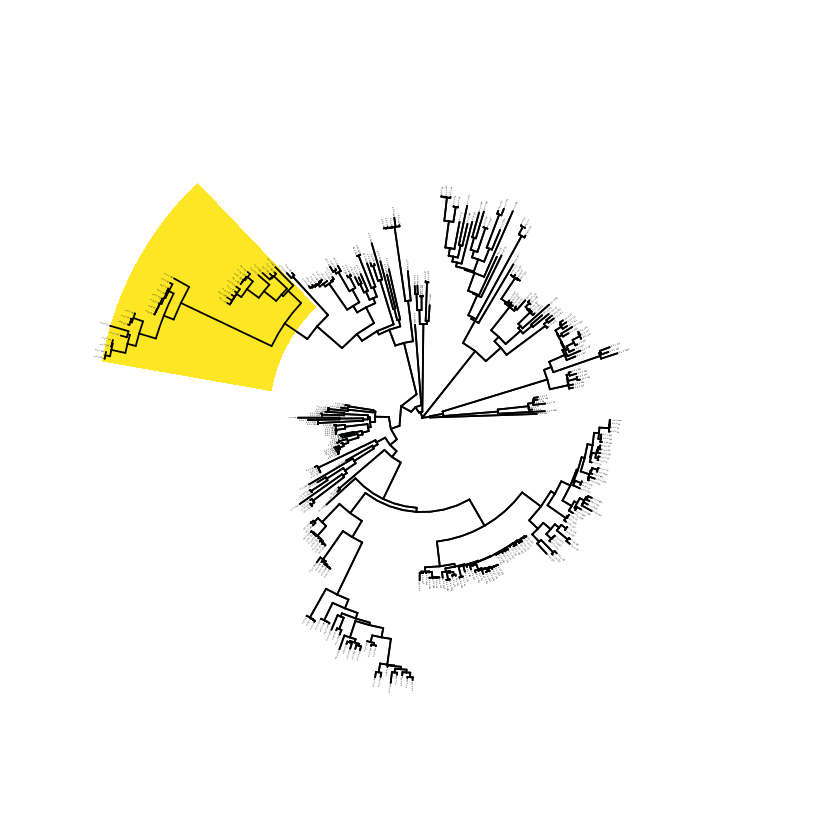

In [4]:
system("mkdir img")
asv_tab_diff <- as.matrix(t(read.table("../01-read_processing/sequence_table.filt.txt", header=T, sep="\t")))

# only DOMHaIN samples
filt.list <- grep(colnames(asv_tab_diff), pattern="DM", value=T)
asv_tab_diff <- asv_tab_diff[,colnames(asv_tab_diff) %in% filt.list]
filtmap <- metadata[rownames(metadata) %in% filt.list,]
filtmap <- filtmap[match(filt.list, rownames(filtmap)),]

x <- as.factor(filtmap$study_group) # variable of interest
tree <- phy_tree(philr.dat)
tax <- tax_table(philr.dat)
common.asvs <- which(rowSums(asv_tab_diff>0)>50)
asv_tab_diff <- asv_tab_diff[common.asvs,]
tree <- ape::drop.tip(tree, setdiff(tree$tip.label, rownames(asv_tab_diff)))
pf <- PhyloFactor(asv_tab_diff, tree, x, nfactors=3)
pf$Data <- pf$Data[pf$tree$tip.label,]
gtree <- pf.tree(pf)
pdf("img/phylofactor_tree.study_group.pdf")
gtree$ggplot + geom_tiplab(size=0.5)
dev.off()
gtree$ggplot + geom_tiplab(size=0.5)

Factor 1 boxplots

png 
  2

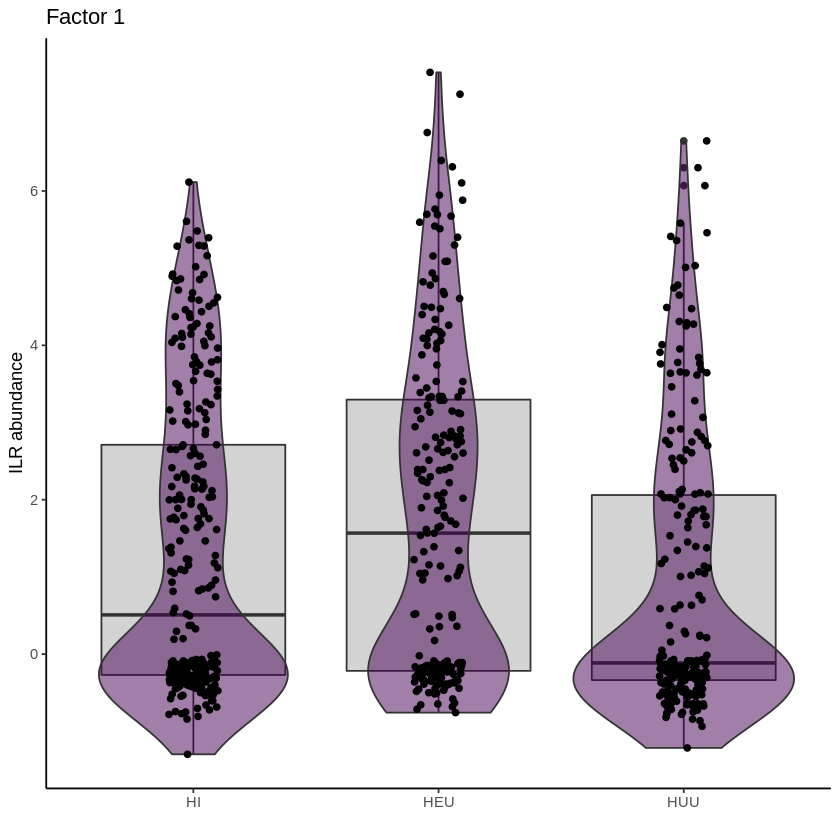

In [5]:
levs <- c("HI", "HEU", "HUU")
y <- t(pf$basis[,1]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[1], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 1')
bplt
pdf("img/factor1_boxp.study_group.pdf")
bplt
dev.off()

Significance

In [6]:
# significance (this is ugly code but it gets the job done)
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

[1] "HEU vs HI: p=0.015665033401107 W=37007"
[1] "HEU vs HUU: p=1.39117529798392e-06 W=32506"
[1] "HEU vs HUU: p=1.39117529798392e-06 W=32506"
[1] "HI vs HUU: p=0.00423391930861931 W=38730"
[1] "HI vs HUU: p=0.00423391930861931 W=38730"
[1] "HEU vs HI: p=0.015665033401107 W=37007"
[1] "HEU vs HUU: p=1.39117529798392e-06 W=32506"
[1] "HEU vs HUU: p=1.39117529798392e-06 W=32506"
[1] "HUU vs HI: p=0.00423391930861931 W=28890"
[1] "HI vs HUU: p=0.00423391930861931 W=38730"
[1] "HI vs HUU: p=0.00423391930861931 W=38730"
[1] "HUU vs HI: p=0.00423391930861931 W=28890"


Factor 2

png 
  2

[1] "HI vs HUU: p=0.00107078984453791 W=39437"
[1] "HI vs HUU: p=0.00107078984453791 W=39437"
[1] "HUU vs HI: p=0.00107078984453791 W=28183"
[1] "HI vs HUU: p=0.00107078984453791 W=39437"
[1] "HI vs HUU: p=0.00107078984453791 W=39437"
[1] "HUU vs HI: p=0.00107078984453791 W=28183"


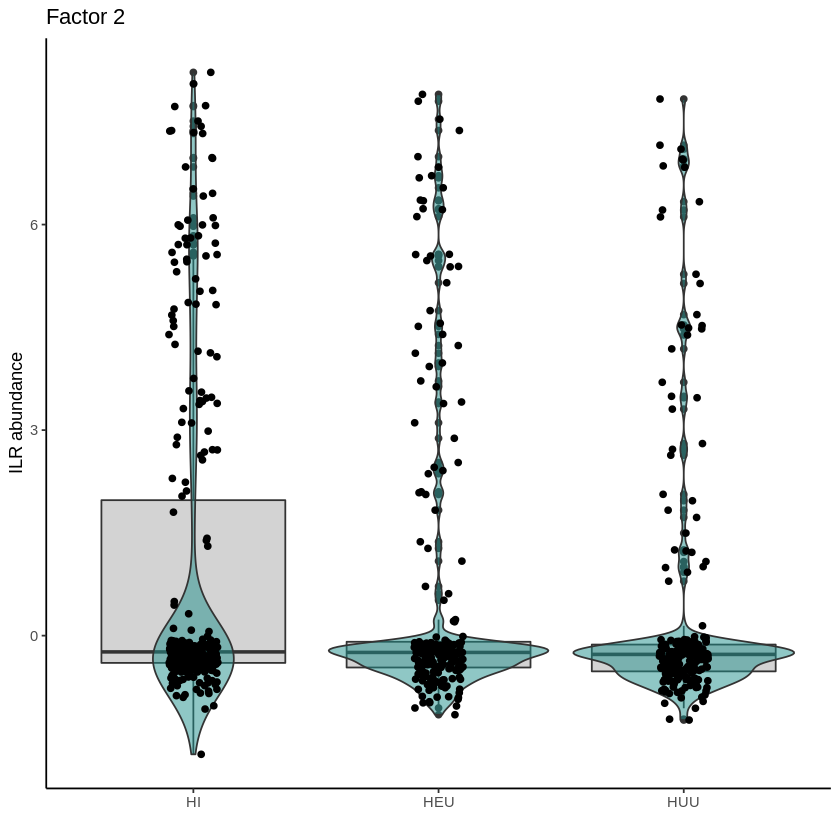

In [7]:
y <- t(pf$basis[,2]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[2], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 2') 
bplt
pdf("img/factor2_boxp.study_group.pdf")
bplt
dev.off()

# significance
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

Factor 3

png 
  2

[1] "HEU vs HI: p=0.000724649908411618 W=38633"
[1] "HEU vs HUU: p=0.0246881996173597 W=28900"
[1] "HEU vs HUU: p=0.0246881996173597 W=28900"
[1] "HEU vs HI: p=0.000724649908411618 W=38633"
[1] "HEU vs HUU: p=0.0246881996173597 W=28900"
[1] "HEU vs HUU: p=0.0246881996173597 W=28900"


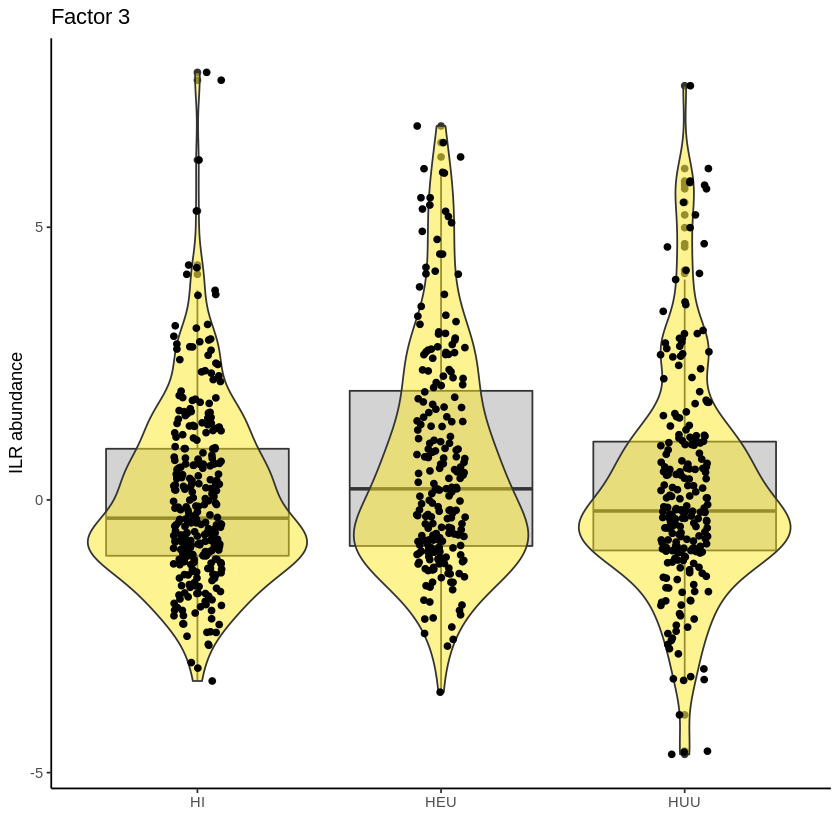

In [8]:
y <- t(pf$basis[,3]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[3], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 3')
bplt 
pdf("img/factor3_boxp.study_group.pdf")
bplt
dev.off()

# significance
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

#### 3b. By aliquot type

Warning message in PhyloFactor(asv_tab_diff, tree, x, nfactors = 3):
“Data has zeros and will receive default modification of zeros. Zeros will be replaced column wise with delta*min(x[x>0]), default delta=0.65”


png 
  2

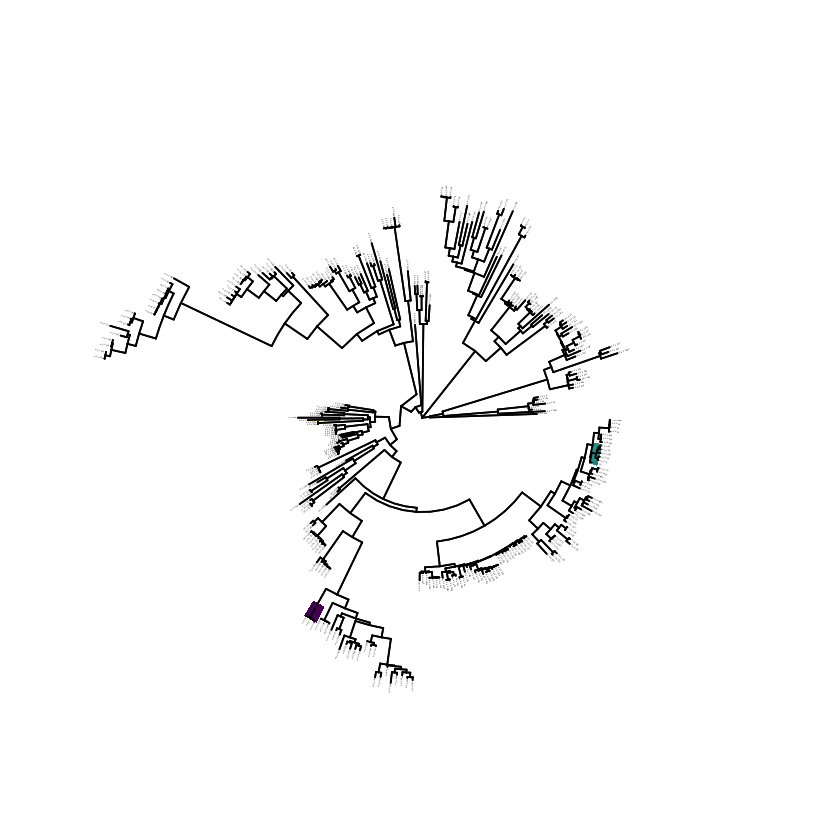

In [9]:
x <- as.factor(filtmap$aliquot_type) # variable of interest
tree <- phy_tree(philr.dat)
tax <- tax_table(philr.dat)
common.asvs <- which(rowSums(asv_tab_diff>0)>50)
asv_tab_diff <- asv_tab_diff[common.asvs,]
tree <- ape::drop.tip(tree, setdiff(tree$tip.label, rownames(asv_tab_diff)))
pf <- PhyloFactor(asv_tab_diff, tree, x, nfactors=3)
pf$Data <- pf$Data[pf$tree$tip.label,]
gtree <- pf.tree(pf)
pdf("img/phylofactor_tree.aliquot_type.pdf")
gtree$ggplot + geom_tiplab(size=0.5)
dev.off()
gtree$ggplot + geom_tiplab(size=0.5)

Factor 1

png 
  2

[1] "CA-PD vs CA-PE: p=0.000307310236269425 W=3534"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CA-PE: p=0.000307310236269425 W=3534"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "C

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PD vs CA-PE: p=0.000307310236269425 W=3534"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CA-PE: p=0.000307310236269425 W=3534"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "C

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[ro

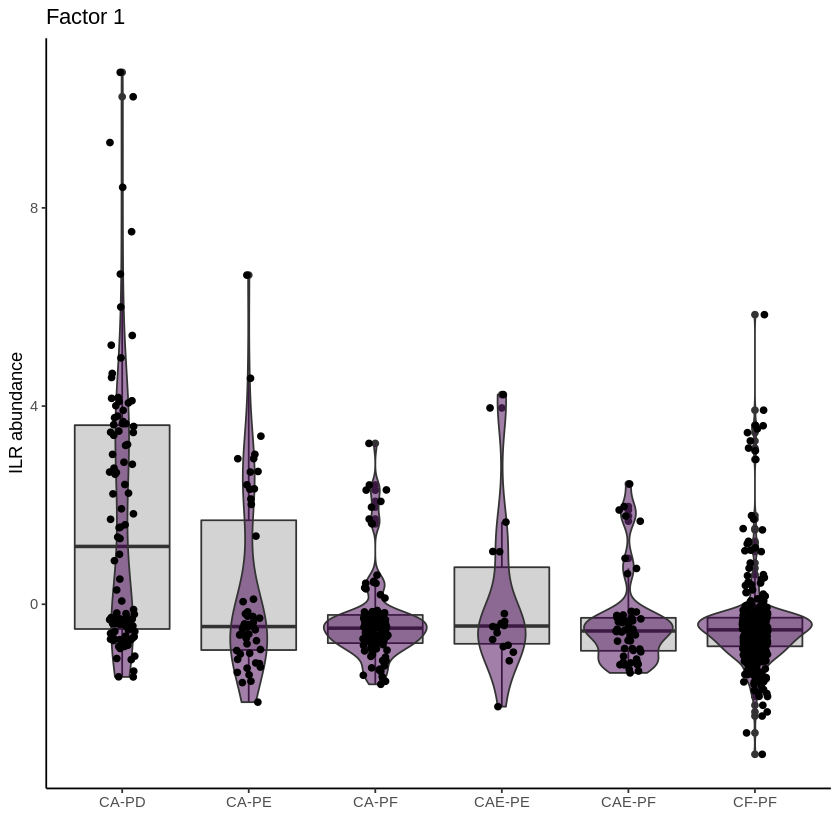

In [10]:
levs <- c("CA-PD", "CA-PE", "CA-PF", "CAE-PE", "CAE-PF", "CF-PF")
y <- t(pf$basis[,1]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[1], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 1')
bplt
pdf("img/factor1_boxp.aliquot_type.pdf")
bplt
dev.off()

# significance
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

Factor 2

png 
  2

[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD 

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CF-PF vs CA-PE: p=0.029872

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"


Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"


Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"


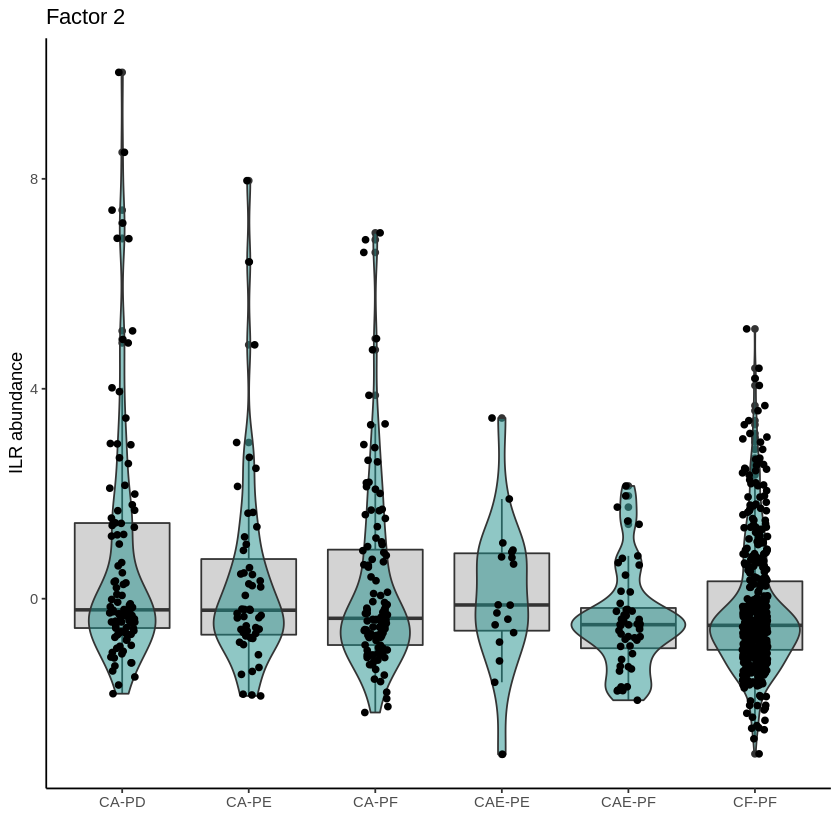

In [11]:
y <- t(pf$basis[,2]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[2], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 2')
bplt
pdf("img/factor2_boxp.aliquot_type.pdf")
bplt
dev.off()

# significance
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

Factor 3

png 
  2

[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD 

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CF-PF vs CA-PE: p=0.029872

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"


Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"


Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"


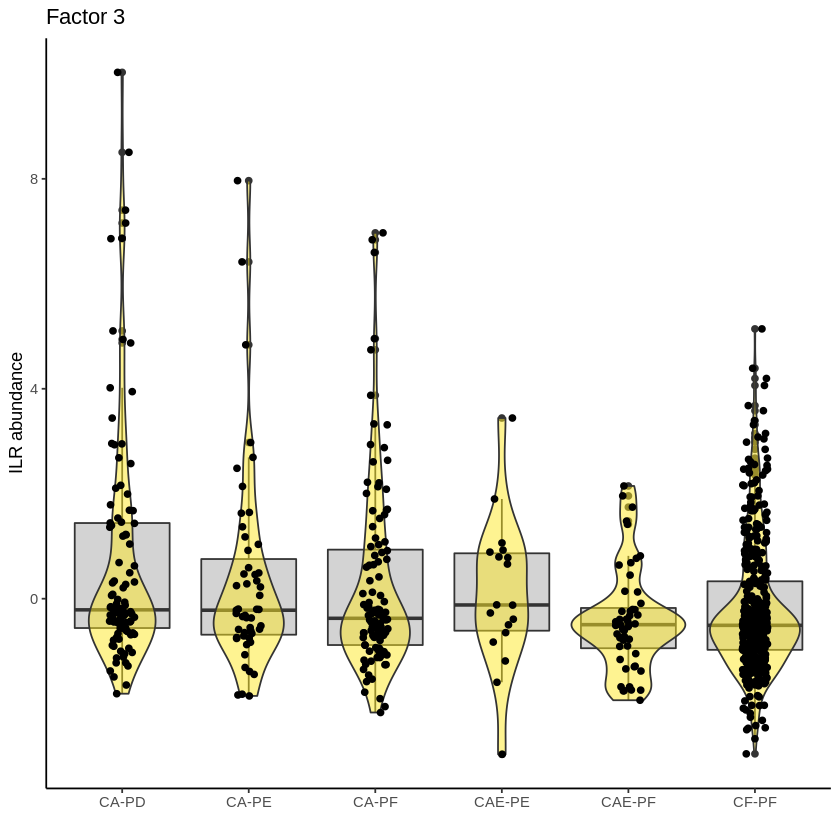

In [12]:
y <- t(pf$basis[,2]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[3], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 3')
bplt
pdf("img/factor3_boxp.aliquot_type.pdf")
bplt
dev.off()

# significance
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

### 4. DESeq2

In [11]:
# subset samples to only include HI and HUU CF-PF
cfpf <- subset_samples(ps.dat.noUS, aliquot_study == "HI.CF-PF" | aliquot_study == "HUU.CF-PF")
sample_data(cfpf)$aliquot_study <- as.factor(sample_data(cfpf)$aliquot_study)
difabund <- phyloseq_to_deseq2(cfpf, ~ aliquot_study)

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans <- apply(counts(difabund), 1, gm_mean)
difabund <- estimateSizeFactors(difabund, geoMeans = geoMeans)
res <- DESeq(difabund, fitType="local")

sigtab <- results(res)
sigtab <- sigtab[order(sigtab$padj, na.last = NA),]
sigtab <- sigtab[(sigtab$padj < 0.05),]
sigtab <- cbind(as(sigtab, "data.frame"), as(tax_table(cfpf)[rownames(sigtab),], "matrix"))
sigtab

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column nam

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV48,4.759455,-25.16062,2.891319,-8.702126,3.25725e-18,8.533994e-15,Bacteria,FCB_group,Bacteroidetes/Chlorobi_group,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_oralis,Prevotella_oralis_unknown,Prevotella_oralis_unknown


Plot results

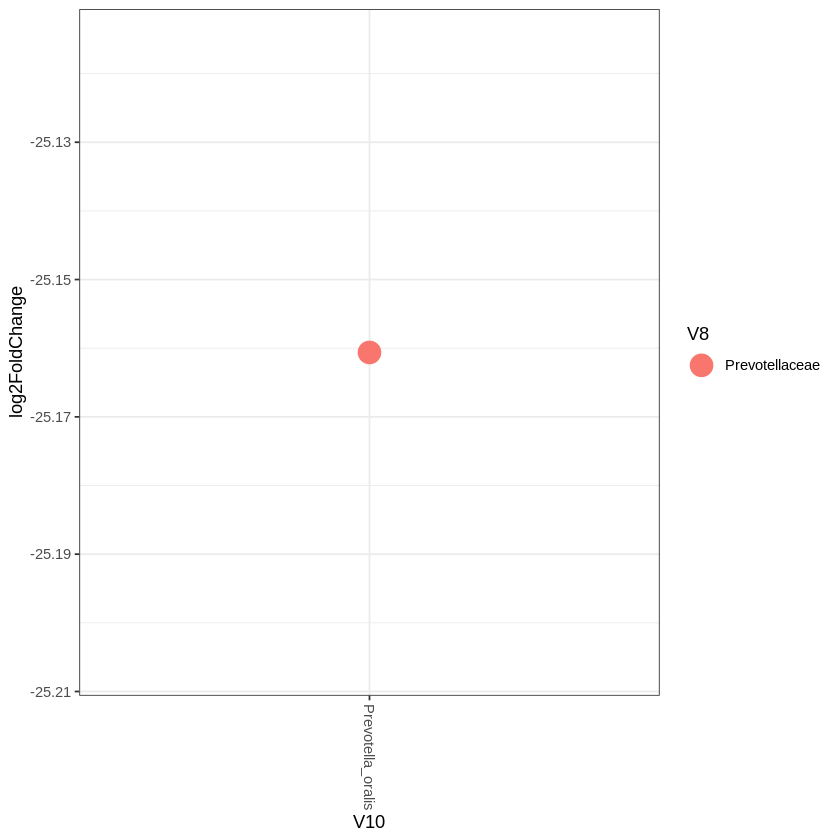

In [12]:
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
x = tapply(sigtab$log2FoldChange, sigtab$V10, function(x) max(x))
x = sort(x, TRUE)
sigtab$V10 = factor(as.character(sigtab$V10), levels=names(x))
# Genus order
x = tapply(sigtab$log2FoldChange, sigtab$V10, function(x) max(x))
x = sort(x, TRUE)
sigtab$V10 = factor(as.character(sigtab$V10), levels=names(x))
ggplot(sigtab, aes(x=V10, y=log2FoldChange, color=V8)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

In [13]:
cfpf <- subset_samples(ps.dat.noUS, aliquot_study == "HI.CF-PF" | aliquot_study == "HEU.CF-PF")
sample_data(cfpf)$aliquot_study <- as.factor(sample_data(cfpf)$aliquot_study)
difabund <- phyloseq_to_deseq2(cfpf, ~ aliquot_study)

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans <- apply(counts(difabund), 1, gm_mean)
difabund <- estimateSizeFactors(difabund, geoMeans = geoMeans)
res <- DESeq(difabund, fitType="local")

sigtab <- results(res)
sigtab <- sigtab[order(sigtab$padj, na.last = NA),]
sigtab <- sigtab[(sigtab$padj < 0.05),]
sigtab <- cbind(as(sigtab, "data.frame"), as(tax_table(cfpf)[rownames(sigtab),], "matrix"))
sigtab

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column nam

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV150,10.384670,-26.12321,1.886049,-13.850757,1.258780e-43,3.337025e-40,Bacteria,FCB_group,Bacteroidetes/Chlorobi_group,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Capnocytophaga,Capnocytophaga_gingivalis,Capnocytophaga_gingivalis_unknown,Capnocytophaga_gingivalis_unknown
ASV71,13.978809,-26.15632,2.898233,-9.024919,1.798285e-19,2.383626e-16,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,Leptotrichia,unclassified_Leptotrichia,Leptotrichia_sp._oral_taxon_417,Leptotrichia_sp._oral_taxon_417_unknown,Leptotrichia_sp._oral_taxon_417_unknown,Leptotrichia_sp._oral_taxon_417_unknown
ASV120,8.086232,25.32706,2.897574,8.740783,2.315010e-18,2.045697e-15,Bacteria,Terrabacteria_group,Actinobacteria,Actinomycetia,Corynebacteriales,Corynebacteriaceae,Corynebacterium,Corynebacterium_matruchotii,Corynebacterium_matruchotii_ATCC_33806,Corynebacterium_matruchotii_ATCC_33806_unknown,Corynebacterium_matruchotii_ATCC_33806_unknown


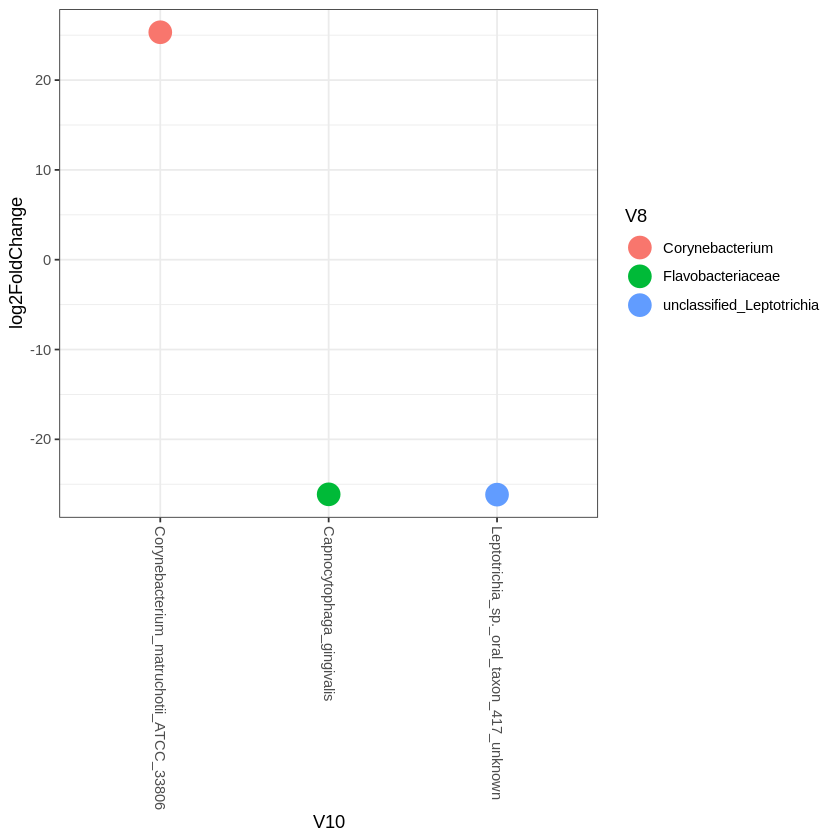

In [14]:
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
x = tapply(sigtab$log2FoldChange, sigtab$V10, function(x) max(x))
x = sort(x, TRUE)
sigtab$V10 = factor(as.character(sigtab$V10), levels=names(x))
# Genus order
x = tapply(sigtab$log2FoldChange, sigtab$V10, function(x) max(x))
x = sort(x, TRUE)
sigtab$V10 = factor(as.character(sigtab$V10), levels=names(x))
ggplot(sigtab, aes(x=V10, y=log2FoldChange, color=V8)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

In [15]:
cfpf <- subset_samples(ps.dat.noUS, aliquot_study == "HEU.CF-PF" | aliquot_study == "HUU.CF-PF")
sample_data(cfpf)$aliquot_study <- as.factor(sample_data(cfpf)$aliquot_study)
difabund <- phyloseq_to_deseq2(cfpf, ~ aliquot_study)

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans <- apply(counts(difabund), 1, gm_mean)
difabund <- estimateSizeFactors(difabund, geoMeans = geoMeans)
res <- DESeq(difabund, fitType="local")

sigtab <- results(res)
sigtab <- sigtab[order(sigtab$padj, na.last = NA),]
sigtab <- sigtab[(sigtab$padj < 0.05),]
# sigtab <- cbind(as(sigtab, "data.frame"), as(tax_table(cfpf)[rownames(sigtab),], "matrix"))
sigtab # no significant differences

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column nam

log2 fold change (MLE): aliquot study HUU.CF.PF vs HEU.CF.PF 
Wald test p-value: aliquot study HUU.CF.PF vs HEU.CF.PF 
DataFrame with 0 rows and 6 columns

In [21]:
capd <- subset_samples(ps.dat.noUS, aliquot_study == "HI.CA-PD" | aliquot_study == "HUU.CA-PD")
sample_data(capd)$aliquot_study <- as.factor(sample_data(capd)$aliquot_study)
difabund <- phyloseq_to_deseq2(capd, ~ aliquot_study)

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans <- apply(counts(difabund), 1, gm_mean)
difabund <- estimateSizeFactors(difabund, geoMeans = geoMeans)
res <- DESeq(difabund, fitType="local")

sigtab <- results(res)
sigtab <- sigtab[order(sigtab$padj, na.last = NA),]
sigtab <- sigtab[(sigtab$padj < 0.05),]
sigtab <- cbind(as(sigtab, "data.frame"), as(tax_table(cfpf)[rownames(sigtab),], "matrix"))
sigtab

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column nam

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV23,26.579076,-23.90509,2.066089,-11.570214,5.833689e-31,3.161859e-28,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,Leptotrichia,unclassified_Leptotrichia,Leptotrichia_sp._oral_taxon_498,Leptotrichia_sp._oral_taxon_498_unknown,Leptotrichia_sp._oral_taxon_498_unknown,Leptotrichia_sp._oral_taxon_498_unknown
ASV198,11.832316,-23.46447,2.553982,-9.187408,4.024195e-20,1.090557e-17,Bacteria,Proteobacteria,Betaproteobacteria,Neisseriales,Neisseriaceae,Neisseria,Neisseria_perflava,Neisseria_perflava_unknown,Neisseria_perflava_unknown,Neisseria_perflava_unknown,Neisseria_perflava_unknown
ASV96,16.945775,-24.02369,2.709677,-8.865886,7.589817e-19,1.371227e-16,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Fusobacteriaceae,Fusobacterium,Fusobacterium_nucleatum,Fusobacterium_nucleatum_subsp._vincentii,Fusobacterium_nucleatum_subsp._vincentii_ATCC_49256,Fusobacterium_nucleatum_subsp._vincentii_ATCC_49256_unknown,Fusobacterium_nucleatum_subsp._vincentii_ATCC_49256_unknown
ASV206,7.399474,24.40780,2.853519,8.553580,1.193289e-17,1.616907e-15,Bacteria,Terrabacteria_group,Firmicutes,Firmicutes_unknown,Firmicutes_unknown,Firmicutes_unknown,Firmicutes_unknown,Firmicutes_unknown_unknown,Firmicutes_unknown_unknown,Firmicutes_unknown_unknown,Firmicutes_unknown_unknown
ASV93,7.856720,24.48935,3.078417,7.955176,1.788766e-15,1.939022e-13,Bacteria,Terrabacteria_group,Actinobacteria,Actinomycetia,Corynebacteriales,Corynebacteriaceae,Corynebacterium,Corynebacterium_matruchotii,Corynebacterium_matruchotii_ATCC_33806,Corynebacterium_matruchotii_ATCC_33806_unknown,Corynebacterium_matruchotii_ATCC_33806_unknown
ASV250,11.188925,24.99263,3.181508,7.855592,3.978888e-15,3.135191e-13,Bacteria,Terrabacteria_group,Actinobacteria,Actinomycetia,Micrococcales,Micrococcaceae,Rothia,Rothia_dentocariosa,Rothia_dentocariosa_M567,Rothia_dentocariosa_M567_unknown,Rothia_dentocariosa_M567_unknown
ASV618,17.215008,-24.02788,3.059750,-7.852889,4.065605e-15,3.135191e-13,Bacteria,FCB_group,Bacteroidetes/Chlorobi_group,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Capnocytophaga,unclassified_Capnocytophaga,Capnocytophaga_sp._oral_taxon_903,Capnocytophaga_sp._oral_taxon_903_unknown
ASV941,12.602134,-23.61334,3.013196,-7.836641,4.627588e-15,3.135191e-13,Bacteria,FCB_group,Bacteroidetes/Chlorobi_group,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_unknown,Prevotella_unknown,Prevotella_unknown
ASV194,7.322926,24.39773,3.181737,7.668055,1.746243e-14,1.051627e-12,Bacteria,Terrabacteria_group,Firmicutes,Clostridia,Eubacteriales,Lachnospiraceae,unclassified_Lachnospiraceae,Lachnospiraceae_bacterium_oral_taxon_500,Lachnospiraceae_oral_taxon_107_str._F0167,Lachnospiraceae_oral_taxon_107_str._F0167_unknown,Lachnospiraceae_oral_taxon_107_str._F0167_unknown


png 
  2

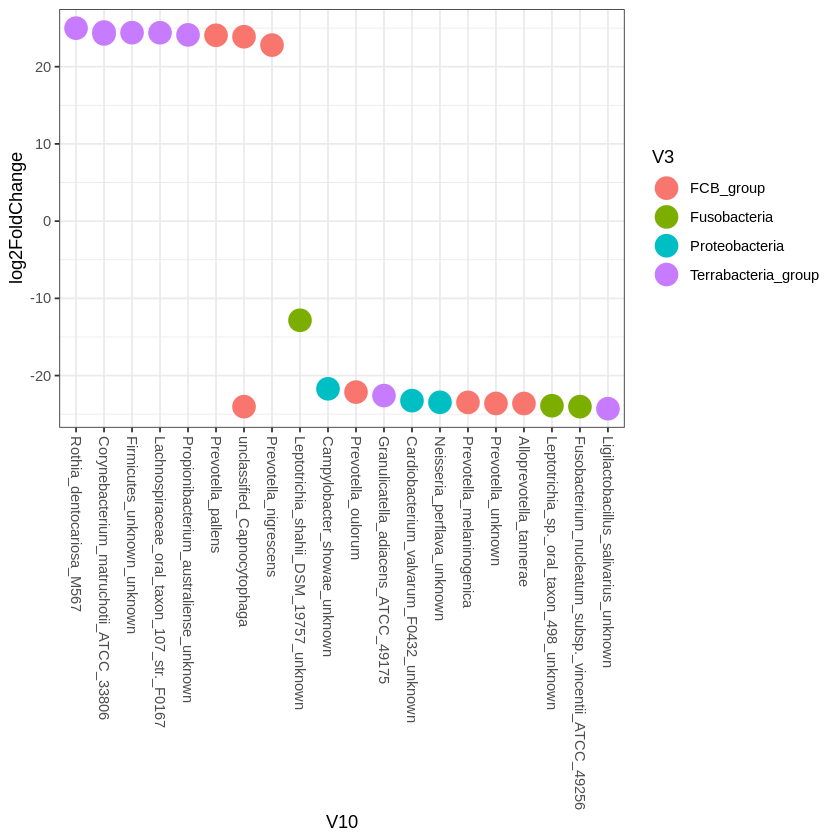

In [26]:
x = tapply(sigtab$log2FoldChange, sigtab$V10, function(x) max(x))
x = sort(x, TRUE)
sigtab$V10 = factor(as.character(sigtab$V10), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$V10, function(x) max(x))
x = sort(x, TRUE)
sigtab$V10 = factor(as.character(sigtab$V10), levels=names(x))
ggplot(sigtab, aes(x=V10, y=log2FoldChange, color=V3)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
pdf("img/deseq_ca-pd_HIvHUU.pdf")
ggplot(sigtab, aes(x=V10, y=log2FoldChange, color=V3)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
dev.off()

In [27]:
capd <- subset_samples(ps.dat.noUS, aliquot_study == "HI.CA-PD" | aliquot_study == "HEU.CA-PD")
sample_data(capd)$aliquot_study <- as.factor(sample_data(capd)$aliquot_study)
difabund <- phyloseq_to_deseq2(capd, ~ aliquot_study)

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans <- apply(counts(difabund), 1, gm_mean)
difabund <- estimateSizeFactors(difabund, geoMeans = geoMeans)
res <- DESeq(difabund, fitType="local")

sigtab <- results(res)
sigtab <- sigtab[order(sigtab$padj, na.last = NA),]
sigtab <- sigtab[(sigtab$padj < 0.05),]
sigtab <- cbind(as(sigtab, "data.frame"), as(tax_table(cfpf)[rownames(sigtab),], "matrix"))
sigtab

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column nam

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV885,16.419212,-26.228227,2.114809,-12.402173,2.543311e-35,1.561593e-32,Bacteria,FCB_group,Bacteroidetes/Chlorobi_group,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,unclassified_Prevotella,Prevotella_sp._oral_taxon_472,Prevotella_sp._oral_taxon_472_str._F0295
ASV583,17.761149,-26.339135,2.734611,-9.631768,5.871053e-22,1.802413e-19,Bacteria,FCB_group,Bacteroidetes/Chlorobi_group,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Capnocytophaga,Capnocytophaga_endodontalis,Capnocytophaga_endodontalis_unknown,Capnocytophaga_endodontalis_unknown
ASV198,10.664683,22.676375,2.418275,9.377086,6.782117e-21,1.388073e-18,Bacteria,Proteobacteria,Betaproteobacteria,Neisseriales,Neisseriaceae,Neisseria,Neisseria_perflava,Neisseria_perflava_unknown,Neisseria_perflava_unknown,Neisseria_perflava_unknown,Neisseria_perflava_unknown
ASV494,15.486299,23.193666,2.554000,9.081312,1.072743e-19,1.646660e-17,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,Leptotrichia,unclassified_Leptotrichia,Leptotrichia_sp._oral_taxon_417,Leptotrichia_sp._oral_taxon_417_unknown,Leptotrichia_sp._oral_taxon_417_unknown,Leptotrichia_sp._oral_taxon_417_unknown
ASV4867,5.994865,-24.855850,2.782113,-8.934161,4.102778e-19,5.038211e-17,Bacteria,Bacteria_incertae_sedis,Bacteria_candidate_phyla,Candidatus_Saccharibacteria,unclassified_Saccharibacteria,Candidatus_Saccharibacteria_bacterium_oral_taxon_488,Candidatus_Saccharibacteria_bacterium_oral_taxon_488_unknown,Candidatus_Saccharibacteria_bacterium_oral_taxon_488_unknown_unknown,Candidatus_Saccharibacteria_bacterium_oral_taxon_488_unknown_unknown,Candidatus_Saccharibacteria_bacterium_oral_taxon_488_unknown_unknown,Candidatus_Saccharibacteria_bacterium_oral_taxon_488_unknown_unknown
ASV957,17.766765,-26.337452,3.064124,-8.595427,8.295566e-18,8.489129e-16,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,Leptotrichia,Leptotrichia_shahii,Leptotrichia_shahii_DSM_19757,Leptotrichia_shahii_DSM_19757_unknown,Leptotrichia_shahii_DSM_19757_unknown,Leptotrichia_shahii_DSM_19757_unknown
ASV103,22.555476,21.853170,2.550391,8.568556,1.047909e-17,9.191662e-16,Bacteria,FCB_group,Bacteroidetes/Chlorobi_group,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Capnocytophaga,unclassified_Capnocytophaga,unclassified_Capnocytophaga_unknown,unclassified_Capnocytophaga_unknown
ASV1889,13.473533,-25.961329,3.064220,-8.472410,2.403678e-17,1.639843e-15,Bacteria,Terrabacteria_group,Firmicutes,Clostridia,Eubacteriales,Lachnospiraceae,Catonella,Catonella_morbi,Catonella_morbi_ATCC_51271,Catonella_morbi_ATCC_51271_unknown,Catonella_morbi_ATCC_51271_unknown
ASV388,14.030700,-25.988322,3.064204,-8.481263,2.227625e-17,1.639843e-15,Bacteria,Terrabacteria_group,Firmicutes,Clostridia,Eubacteriales,Lachnospiraceae,Lachnoanaerobaculum,Lachnoanaerobaculum_saburreum,Lachnoanaerobaculum_saburreum_DSM_3986,Lachnoanaerobaculum_saburreum_DSM_3986_unknown,Lachnoanaerobaculum_saburreum_DSM_3986_unknown


png 
  2

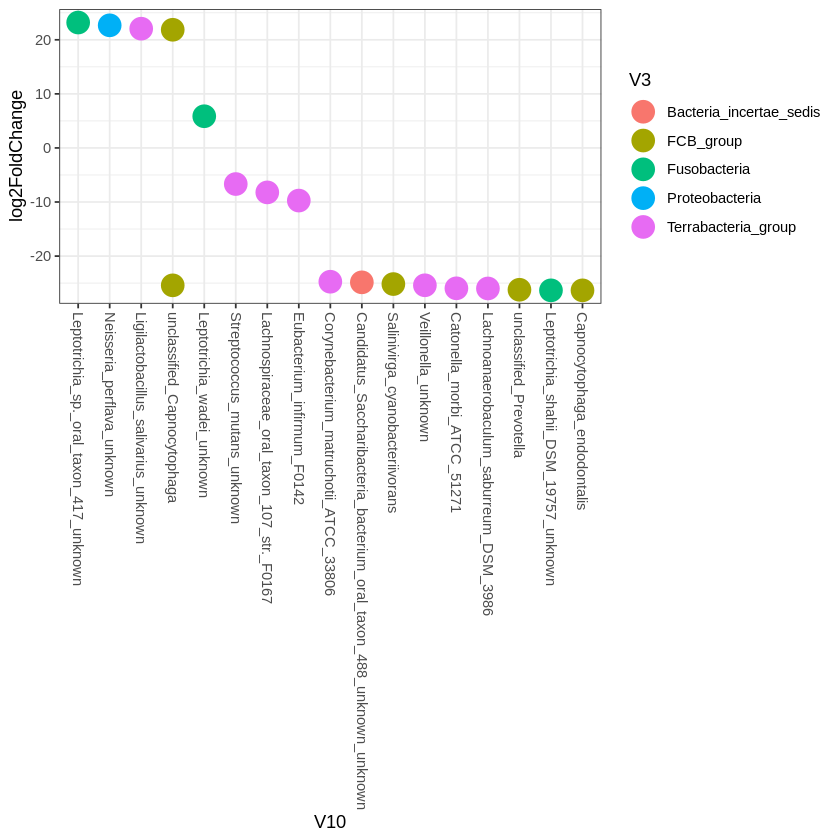

In [28]:
x = tapply(sigtab$log2FoldChange, sigtab$V10, function(x) max(x))
x = sort(x, TRUE)
sigtab$V10 = factor(as.character(sigtab$V10), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$V10, function(x) max(x))
x = sort(x, TRUE)
sigtab$V10 = factor(as.character(sigtab$V10), levels=names(x))
ggplot(sigtab, aes(x=V10, y=log2FoldChange, color=V3)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
pdf("img/deseq_ca-pd_HIvHEU.pdf")
ggplot(sigtab, aes(x=V10, y=log2FoldChange, color=V3)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
dev.off()

In [4]:
capd <- subset_samples(ps.dat.noUS, aliquot_study == "HEU.CA-PD" | aliquot_study == "HUU.CA-PD")
sample_data(capd)$aliquot_study <- as.factor(sample_data(capd)$aliquot_study)
difabund <- phyloseq_to_deseq2(capd, ~ aliquot_study)

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans <- apply(counts(difabund), 1, gm_mean)
difabund <- estimateSizeFactors(difabund, geoMeans = geoMeans)
res <- DESeq(difabund, fitType="local")

sigtab <- results(res)
sigtab <- sigtab[order(sigtab$padj, na.last = NA),]
sigtab <- sigtab[(sigtab$padj < 0.05),]
sigtab <- cbind(as(sigtab, "data.frame"), as(tax_table(capd)[rownames(sigtab),], "matrix"))
sigtab 

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV885,25.955800,-25.164768,2.125380,-11.840125,2.420925e-32,8.521654e-30,Bacteria,FCB_group,Bacteroidetes/Chlorobi_group,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,unclassified_Prevotella,Prevotella_sp._oral_taxon_472,Prevotella_sp._oral_taxon_472_str._F0295
ASV23,27.312567,-25.243774,2.238374,-11.277729,1.690539e-29,2.975348e-27,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,Leptotrichia,unclassified_Leptotrichia,Leptotrichia_sp._oral_taxon_498,Leptotrichia_sp._oral_taxon_498_unknown,Leptotrichia_sp._oral_taxon_498_unknown,Leptotrichia_sp._oral_taxon_498_unknown
ASV166,16.854746,-24.573371,2.250687,-10.918163,9.438579e-28,1.107460e-25,Bacteria,Spirochaetes,Spirochaetia,Spirochaetales,Treponemataceae,Treponema,unclassified_Treponema,Treponema_sp._OMZ_804,Treponema_sp._OMZ_804_unknown,Treponema_sp._OMZ_804_unknown,Treponema_sp._OMZ_804_unknown
ASV256,18.507083,-24.711667,2.406532,-10.268582,9.762919e-25,8.591369e-23,Bacteria,FCB_group,Bacteroidetes/Chlorobi_group,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_pallens,Prevotella_pallens_ATCC_700821,Prevotella_pallens_ATCC_700821_unknown
ASV1033,11.658427,-24.066987,2.383895,-10.095658,5.774227e-24,4.065056e-22,Bacteria,Terrabacteria_group,Firmicutes,Firmicutes_unknown,Firmicutes_unknown,Firmicutes_unknown,Firmicutes_unknown,Firmicutes_unknown_unknown,Firmicutes_unknown_unknown,Firmicutes_unknown_unknown,Firmicutes_unknown_unknown
ASV124,19.640391,-24.575579,2.550339,-9.636202,5.622984e-22,3.298817e-20,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,Leptotrichia,Leptotrichia_buccalis,Leptotrichia_buccalis_C-1013-b,Leptotrichia_buccalis_C-1013-b_unknown,Leptotrichia_buccalis_C-1013-b_unknown,Leptotrichia_buccalis_C-1013-b_unknown
ASV865,18.554386,-24.506568,2.554979,-9.591691,8.665297e-22,4.357407e-20,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Fusobacteriaceae,Fusobacterium,Fusobacterium_nucleatum,Fusobacterium_nucleatum_subsp._polymorphum,Fusobacterium_nucleatum_subsp._polymorphum_unknown,Fusobacterium_nucleatum_subsp._polymorphum_unknown,Fusobacterium_nucleatum_subsp._polymorphum_unknown
ASV201,15.379465,-24.462101,2.566887,-9.529870,1.574800e-21,6.929118e-20,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,Pseudoleptotrichia,Pseudoleptotrichia_goodfellowii,Leptotrichia_goodfellowii_F0264,Leptotrichia_goodfellowii_F0264_unknown,Leptotrichia_goodfellowii_F0264_unknown,Leptotrichia_goodfellowii_F0264_unknown
ASV172,17.491720,-23.484844,2.560458,-9.172126,4.637798e-20,1.813894e-18,Bacteria,FCB_group,Bacteroidetes/Chlorobi_group,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Capnocytophaga,unclassified_Capnocytophaga,Capnocytophaga_sp._oral_taxon_323,Capnocytophaga_sp._oral_taxon_323_unknown


png 
  2

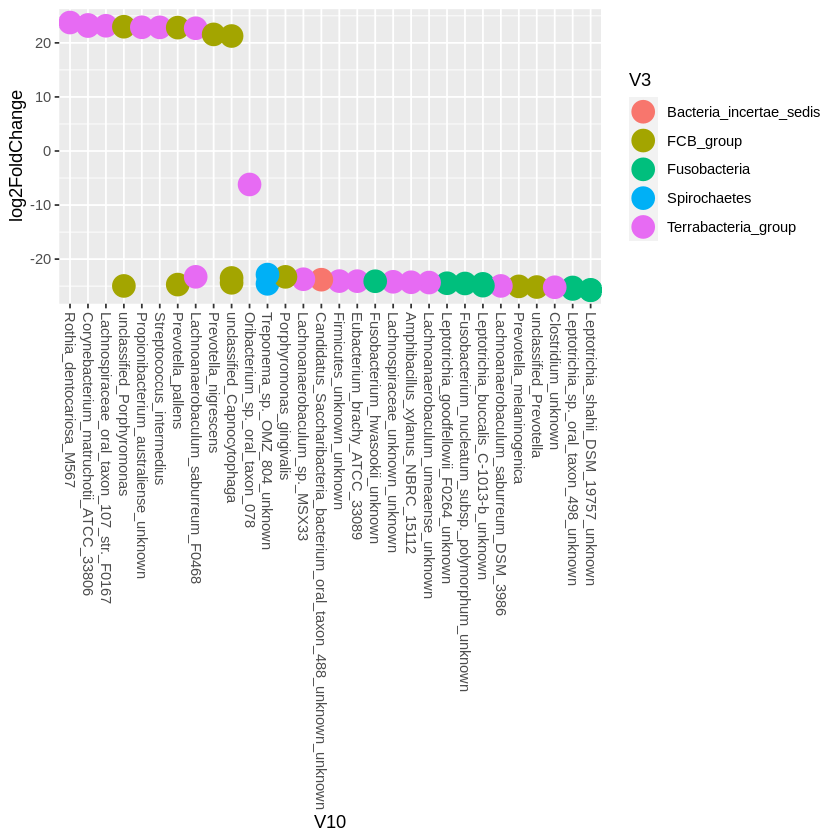

In [6]:
x = tapply(sigtab$log2FoldChange, sigtab$V10, function(x) max(x))
x = sort(x, TRUE)
sigtab$V10 = factor(as.character(sigtab$V10), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$V10, function(x) max(x))
x = sort(x, TRUE)
sigtab$V10 = factor(as.character(sigtab$V10), levels=names(x))
ggplot(sigtab, aes(x=V10, y=log2FoldChange, color=V3)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
pdf("deseq_ca-pd_HEUvHUU.pdf")
ggplot(sigtab, aes(x=V10, y=log2FoldChange, color=V3)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
dev.off()

### 3. Betadiversity of CF-PF and CA-PD

In [11]:
capd <- subset_samples(ps.dat.noUS, aliquot_study == "HI.CA-PD" | aliquot_study == "HUU.CA-PD" | aliquot_study == "HEU.CA-PD")
cfpf <- subset_samples(ps.dat.noUS, aliquot_study == "HI.CF-PF" | aliquot_study == "HUU.CF-PF" | aliquot_study == "HEU.CF-PF")
cape <- subset_samples(ps.dat.noUS, aliquot_study == "HI.CA-PE" | aliquot_study == "HUU.CA-PE" | aliquot_study == "HEU.CA-PE" | aliquot_study == "HI.CAE-PE" | aliquot_study == "HUU.CAE-PE" | aliquot_study == "HEU.CAE-PE")

pdf 
  2

pdf 
  2

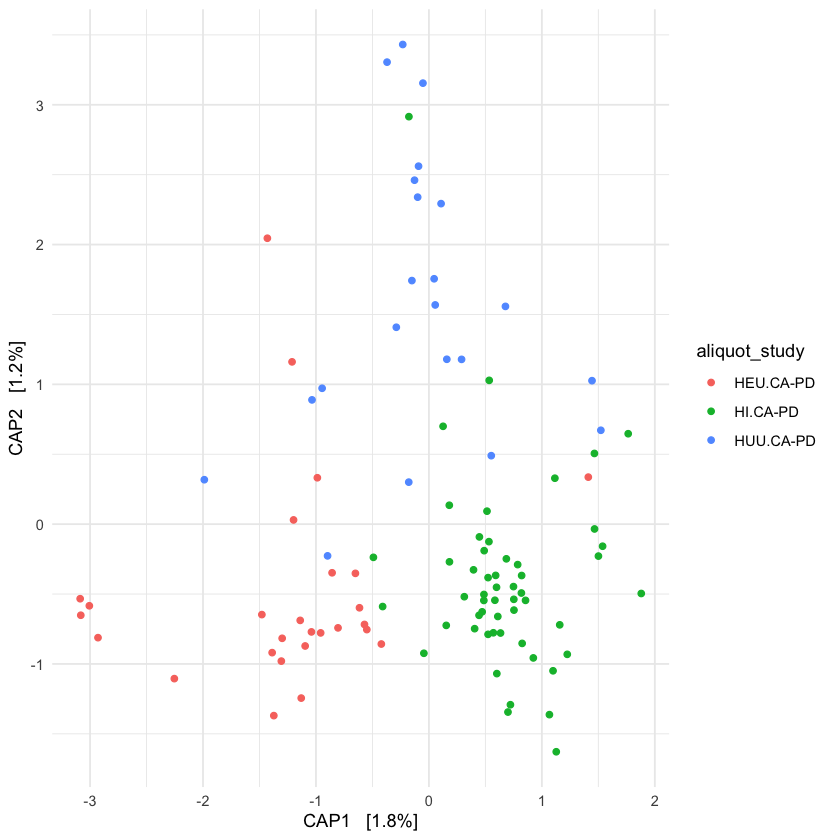

pdf 
  2

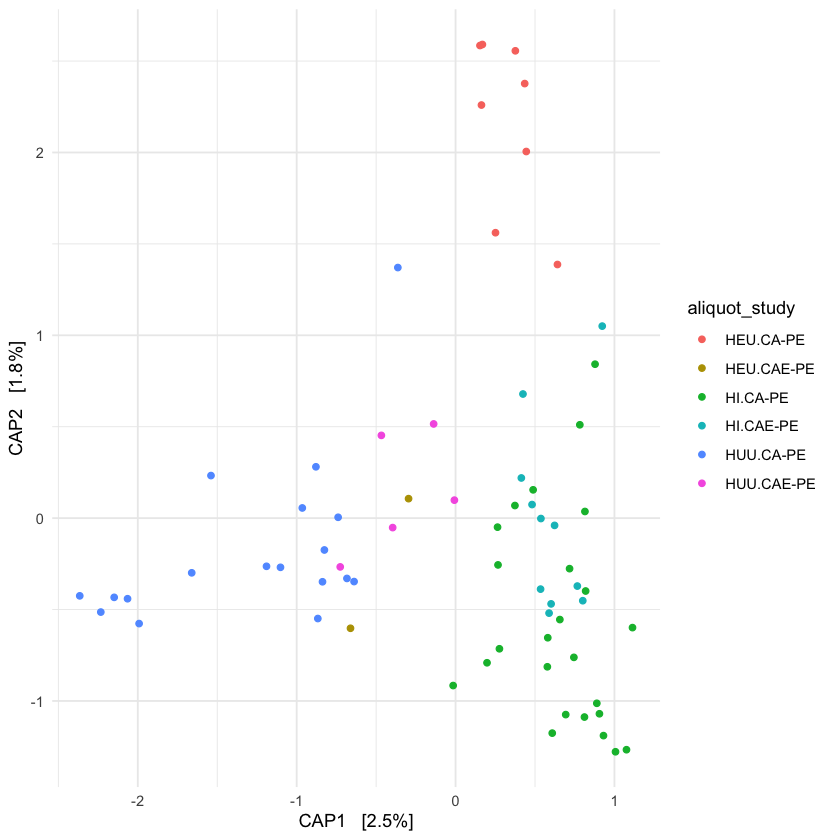

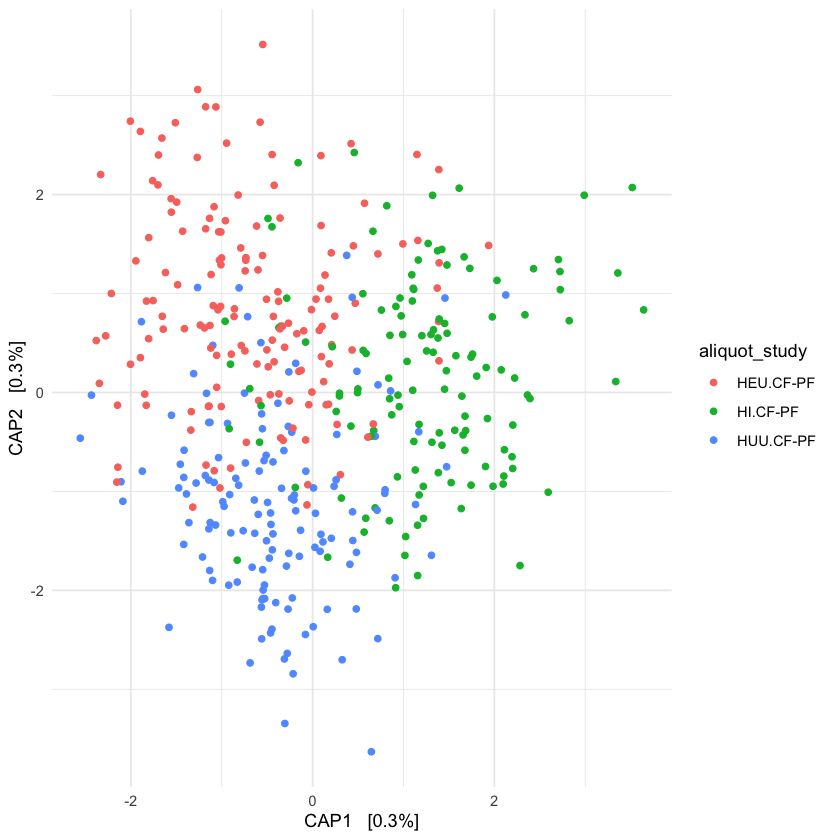

In [12]:
ordcap <- ordinate(capd, "CAP", "bray", ~aliquot_study)
pdf("img/capd_capplot.pdf")
plot_ordination(capd, ordcap, "samples", color="aliquot_study") + theme_minimal()
dev.off()
plot_ordination(capd, ordcap, "samples", color="aliquot_study") + theme_minimal()

ordcap <- ordinate(cape, "CAP", "bray", ~aliquot_study)
pdf("img/cape_caepe_capplot.pdf")
plot_ordination(cape, ordcap, "samples", color="aliquot_study") + theme_minimal()
dev.off()
plot_ordination(cape, ordcap, "samples", color="aliquot_study") + theme_minimal()

ordcap <- ordinate(cfpf, "CAP", "bray", ~aliquot_study)
pdf("img/cfpf_capplot.pdf")
plot_ordination(cfpf, ordcap, "samples", color="aliquot_study") + theme_minimal()
dev.off()
plot_ordination(cfpf, ordcap, "samples", color="aliquot_study") + theme_minimal()